In [1]:
import tensorflow as tf
from tensorflow import keras
# import keras
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

train = pd.read_csv('train.csv')
y_train_full = train['label']
X_train_full = train.drop(['label'], axis=1)
X_test = pd.read_csv('test.csv')

In [2]:
X_train_full.shape

(42000, 784)

In [3]:
X_valid, X_train = X_train_full[:8000] / 255.0, X_train_full[8000:] / 255.0
y_valid, y_train = y_train_full[:8000], y_train_full[8000:]

In [4]:
from PIL import Image
img = Image.fromarray(np.uint8(np.array(X_train_full)[0].reshape(28,28)))
img.show()
print(np.uint8(np.array(X_train_full)[0].reshape(28,28)))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 188 255  94   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0 191 250 253  93   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  123 248 253 167  10   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  80
  247 253 208  13   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

In [5]:
model = keras.models.Sequential()
# model.add(keras.layers.Flatten(input_shape=[784]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [6]:
model = keras.models.Sequential([
# keras.layers.Flatten(input_shape=[784]),
keras.layers.Dense(300, activation="relu"),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dense(10, activation="softmax")
])

In [7]:
opt = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, decay=0.01)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=opt, metrics=["accuracy"])

In [8]:
history = model.fit(X_train, y_train, epochs=60,
                    validation_data=(X_valid, y_valid))

Epoch 1/60

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

1063/1063 [==============================] - 2s 2ms/step - loss: 0.2968 - accuracy: 0.9144 - val_loss: 0.2068 - val_accuracy: 0.9409
Epoch 2/60
1063/1063 [==============================] - 2s 2ms/step - loss: 0.1774 - accuracy: 0.9496 - val_loss: 0.1810 - val_accuracy: 0.9482
Epoch 3/60
1063/1063 [==============================] - 2s 2ms/step - loss: 0.1558 - accuracy: 0.9557 - val_loss: 0.1690 - val_accuracy: 0.9523
Epoch 4/60
1063/1063 [==============================] - 2s 2ms/step - loss: 

1063/1063 [==============================] - 2s 2ms/step - loss: 0.0857 - accuracy: 0.9770 - val_loss: 0.1226 - val_accuracy: 0.9649
Epoch 53/60
1063/1063 [==============================] - 2s 2ms/step - loss: 0.0855 - accuracy: 0.9770 - val_loss: 0.1225 - val_accuracy: 0.9650
Epoch 54/60
1063/1063 [==============================] - 2s 2ms/step - loss: 0.0852 - accuracy: 0.9771 - val_loss: 0.1223 - val_accuracy: 0.9655
Epoch 55/60
1063/1063 [==============================] - 2s 2ms/step - loss: 0.0849 - accuracy: 0.9771 - val_loss: 0.1221 - val_accuracy: 0.9649
Epoch 56/60
1063/1063 [==============================] - 2s 2ms/step - loss: 0.0847 - accuracy: 0.9772 - val_loss: 0.1219 - val_accuracy: 0.9649
Epoch 57/60
1063/1063 [==============================] - 2s 2ms/step - loss: 0.0844 - accuracy: 0.9774 - val_loss: 0.1218 - val_accuracy: 0.9649
Epoch 58/60
1063/1063 [==============================] - 2s 2ms/step - loss: 0.0841 - accuracy: 0.9773 - val_loss: 0.1216 - val_accuracy: 0.96

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


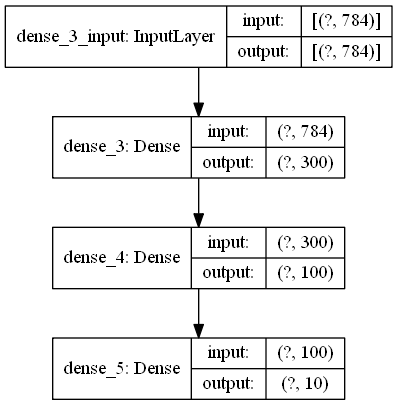

In [12]:
from tensorflow.keras.utils import plot_model
plot_model(model, './model.png', show_shapes=True)

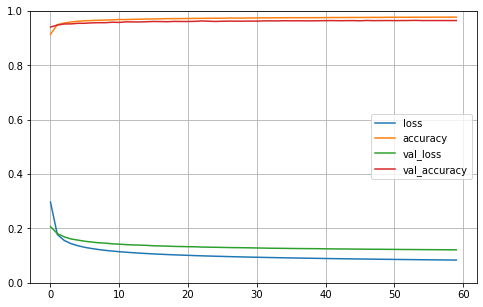

In [13]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [14]:
y_pred = model.predict(X_test)
pred = y_pred.argmax(axis=1).reshape(-1)
print(pred.shape)

(28000,)


In [15]:
image_id = pd.Series(range(1,len(pred)+1))
output = pd.DataFrame({'ImageId':image_id, 'Label':pred})
output.to_csv("submission_NN.csv",  index=False)